In [1]:
import jieba
org = ['台積電', '聯電', '宏達電']
s = '今、明年資本支出近兆台積電大擴產商機來了'
list(jieba.cut(s))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/46/b7dzk4mn6g54qzptv608w7d00000gn/T/jieba.cache
Loading model cost 0.629 seconds.
Prefix dict has been built succesfully.


['今', '、', '明年', '資本', '支出', '近兆', '台積電', '大擴產', '商機', '來', '了']

In [2]:
set(org)

{'台積電', '宏達電', '聯電'}

In [3]:
set(list(jieba.cut(s)))

{'、', '了', '今', '來', '台積電', '商機', '大擴產', '支出', '明年', '資本', '近兆'}

In [5]:
set(org) & set(list(jieba.cut(s)))

{'台積電'}

In [6]:
import re
re.search('台積電', s)

<_sre.SRE_Match object; span=(10, 13), match='台積電'>

## NLTK

In [7]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

In [8]:
sent = '''European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'''

In [9]:
sent = nltk.word_tokenize(sent)

In [10]:
sent

['European',
 'authorities',
 'fined',
 'Google',
 'a',
 'record',
 '$',
 '5.1',
 'billion',
 'on',
 'Wednesday',
 'for',
 'abusing',
 'its',
 'power',
 'in',
 'the',
 'mobile',
 'phone',
 'market',
 'and',
 'ordered',
 'the',
 'company',
 'to',
 'alter',
 'its',
 'practices']

In [11]:
sent = nltk.pos_tag(sent)


In [13]:
for k,pos in  sent:
    if 'JJ' in pos:
        print(k, pos)

European JJ
mobile JJ


## SpaCy

In [14]:
! pip install spacy

You are using pip version 9.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [18]:
! python -m spacy download en_core_web_sm

    100% |████████████████████████████████| 11.1MB 5.7MB/s ta 0:00:01
  Running setup.py install for en-core-web-sm ... done
You are using pip version 9.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [19]:
news = '''
He was the subject of a Canada-wide warrant six years ago — now Mounties say he’s back in Metro Vancouver.

Officers say 32-year-old Cong Dinh helped launder millions of dollars from drugs trafficked onto Canadian streets.

“Cong Dinh is wanted for money laundering. Behind these charges rest many other suspected activities like drug trafficking,” says Sergeant Maxime Langlois from the ‘Be on the Lookout’ program.

He says Dinh is wanted for crimes that “directly threaten the children, people, and communities of the Lower Mainland and British Columbia.”

There is a $50,000 reward for anyone who has information leading to Dinh’s arrest.

Report any information to the RCMP Federal Serious and Organized Crime at 778-290-4435, or Crime Stoppers.
'''

In [20]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()


In [22]:
doc = nlp(news)
[(X.text, X.label_) for X in doc.ents]

[('Canada', 'GPE'),
 ('six years ago', 'DATE'),
 ('Mounties', 'ORG'),
 ('Metro Vancouver', 'FAC'),
 ('Cong Dinh', 'PERSON'),
 ('launder millions of dollars', 'MONEY'),
 ('Canadian', 'NORP'),
 ('Cong Dinh', 'PERSON'),
 ('Sergeant Maxime Langlois', 'PERSON'),
 ('Lookout', 'PERSON'),
 ('Dinh', 'PERSON'),
 ('the Lower Mainland', 'ORG'),
 ('British Columbia', 'GPE'),
 ('50,000', 'MONEY'),
 ('Dinh’s', 'ORG'),
 ('RCMP Federal Serious', 'ORG'),
 ('Organized Crime', 'PERSON'),
 ('778', 'CARDINAL'),
 ('Crime Stoppers', 'PERSON')]

In [24]:
#[(X, X.ent_iob_, X.ent_type_) for X in doc]

In [27]:
displacy.render(nlp(str(news[0:200])), jupyter=True, style='ent')

In [28]:
displacy.render(nlp(str(news)), jupyter=True, style='ent')

In [30]:
! pip install https://github.com/howl-anderson/Chinese_models_for_SpaCy/releases/download/v2.0.5/zh_core_web_sm-2.0.5.tar.gz

    100% |████████████████████████████████| 252.6MB 5.6kB/s ta 0:00:01114% |█▍                              | 11.4MB 2.8MB/s eta 0:01:27    7% |██▎                             | 18.1MB 5.7MB/s eta 0:00:42
  Running setup.py bdist_wheel for zh-core-web-sm ... done
  Stored in directory: /Users/davidchiu/Library/Caches/pip/wheels/d4/58/4c/86fa89c93be6ce006384810fcf0986cc11d22eaed916b7fa33
Successfully built zh-core-web-sm
You are using pip version 9.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [33]:
! python -m spacy link zh_core_web_sm zh

✔ Linking successful
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/zh_core_web_sm
-->
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/spacy/data/zh
You can now load the model via spacy.load('zh')


In [37]:
import zh_core_web_sm

#nlp = zh_core_web_sm.load()
#doc = nlp("王小明在北京的清华大学读书")
#doc

In [39]:
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
ws = WS("/Users/davidchiu/project/ckip/data")
pos = POS("/Users/davidchiu/project/ckip/data")
ner = NER("/Users/davidchiu/project/obanktm/data")
sentence_list = ["""全聯福利中心強力推出「PX Pay」行動支付後，更進一步開放8家銀行的實體信用卡、33家金融機構金融卡、3大電子票證、3大國際行動Pay與台灣Pay等交易。同時釋出8大銀行刷卡優惠，其中聯邦卡首刷500元送1,000點福利點最高，平日則以國泰世華天天消費滿500元送300點最強。"""]

word_sentence_list = ws(sentence_list)
pos_sentence_list = pos(word_sentence_list)
entity_sentence_list = ner(word_sentence_list, pos_sentence_list)



In [40]:
entity_sentence_list

[{(0, 6, 'ORG', '全聯福利中心'),
  (30, 31, 'CARDINAL', '8'),
  (41, 43, 'CARDINAL', '33'),
  (52, 53, 'CARDINAL', '3'),
  (59, 60, 'CARDINAL', '3'),
  (69, 74, 'ORG', '台灣Pay'),
  (82, 83, 'CARDINAL', '8'),
  (93, 96, 'ORG', '聯邦卡'),
  (98, 102, 'MONEY', '500元'),
  (103, 109, 'QUANTITY', '1,000點'),
  (119, 123, 'ORG', '國泰世華'),
  (128, 132, 'MONEY', '500元'),
  (133, 137, 'QUANTITY', '300點')}]

In [41]:
s = '''
嘉義地檢署偵辦129億地下匯兌案，查獲菲律賓、中國大陸賭博網站經營運動彩券、六合彩，2年匯回台灣39億，帶回72人，聲押4名主嫌，7年級生主嫌都以千萬跑車麥拉倫、保時捷等名車代步，查扣6部名車、新台幣及外幣現金共約700萬，檢方不排除涉及選舉賭盤。嘉義地院金凌晨3點多裁定4名主嫌聲押禁見。

檢察官陳靜慧指揮台南市調查站偵辦吳承霖地下匯兌案件，涉及洗錢約129億，其中有陳姓客戶等人涉嫌以羅曼尼、新緻公司架設博弈網站，3日由台南、嘉義縣、市調查站分頭到台北、台中、嘉義縣市等33處所搜索。

查扣現金新台幣650萬元及50萬元外幣（港幣、人民幣、韓幣、日幣、紐西蘭幣）、名車6輛、筆電、電腦主機、手機、監視器主機及螢幕、員工手冊、賭博規則筆記、銀行存摺、帳密等證物，帶回72人，檢方複訊38人，以有串證、逃亡之虞聲押陳姓、2名林姓、楊姓男子共4人，另有12人以5萬至20萬不等交保。

檢方調查，主嫌陳男等4人均是嘉義人，年紀約30歲，自2017年起在臺北市、新北市、臺中市及嘉義市等地，設立羅曼尼公司、新緻公司，架設博弈網站，提供賭客簽注六合彩、運動比賽等賭博，並以大陸地區金融帳戶收付賭金後，透過地下匯兌管道及不實合約等方式，2年分批自境外匯回39億元賭金。

'''

In [42]:
sentence_list = [s]
word_sentence_list = ws(sentence_list)
pos_sentence_list = pos(word_sentence_list)
entity_sentence_list = ner(word_sentence_list, pos_sentence_list)

In [43]:
entity_sentence_list

[{(8, 12, 'CARDINAL', '129億'),
  (20, 23, 'GPE', '菲律賓'),
  (24, 28, 'GPE', '中國大陸'),
  (39, 40, 'CARDINAL', '六'),
  (43, 45, 'DATE', '2年'),
  (47, 49, 'GPE', '台灣'),
  (49, 52, 'CARDINAL', '39億'),
  (55, 57, 'CARDINAL', '72'),
  (61, 62, 'CARDINAL', '4'),
  (74, 76, 'CARDINAL', '千萬'),
  (78, 81, 'PRODUCT', '麥拉倫'),
  (82, 85, 'PRODUCT', '保時捷'),
  (93, 94, 'CARDINAL', '6'),
  (108, 112, 'CARDINAL', '700萬'),
  (125, 129, 'ORG', '嘉義地院'),
  (129, 132, 'PERSON', '金凌晨'),
  (132, 135, 'TIME', '3點多'),
  (137, 138, 'CARDINAL', '4'),
  (151, 154, 'PERSON', '陳靜慧'),
  (156, 162, 'ORG', '台南市調查站'),
  (164, 167, 'PERSON', '吳承霖'),
  (179, 183, 'CARDINAL', '129億'),
  (187, 188, 'PERSON', '陳'),
  (196, 199, 'PERSON', '羅曼尼'),
  (200, 204, 'ORG', '新緻公司'),
  (211, 213, 'DATE', '3日'),
  (214, 216, 'GPE', '台南'),
  (217, 220, 'GPE', '嘉義縣'),
  (228, 230, 'GPE', '台北'),
  (231, 233, 'GPE', '台中'),
  (234, 238, 'GPE', '嘉義縣市'),
  (252, 260, 'MONEY', '新台幣650萬元'),
  (261, 265, 'MONEY', '50萬元'),
  (275, 277, 'MONEY', '韓幣

## 蘋果新聞爬蟲

In [50]:
import requests 
from bs4 import BeautifulSoup
ary = []
for i in range(1,50):
    res = requests.get('https://tw.appledaily.com/new/realtime/{}'.format(i))
    soup = BeautifulSoup(res.text, 'lxml')

    for ele in soup.select('li.rtddt'):
        title = ele.select_one('h1').text
        alink = ele.select_one('a')['href']
        if ('楊蕙如' in title) or ('卡神' in title) :
            ary.append({'title':title, 'link':alink})

In [51]:
import pandas
df = pandas.DataFrame(ary)

In [53]:
df.drop_duplicates(inplace=True)

In [55]:
def parseArticle(link):
    res = requests.get(link)
    soup = BeautifulSoup(res.text, 'lxml')
    return soup.select_one('.ndArticle_margin p').text

In [56]:
ary2 = []
for link in df['link'].tolist():
    ary2.append(parseArticle(link))

## 命名實體識別

In [57]:
sentence_list = ary2
word_sentence_list = ws(sentence_list)
pos_sentence_list = pos(word_sentence_list)
entity_sentence_list = ner(word_sentence_list, pos_sentence_list)

In [59]:
s = set()
for ele in entity_sentence_list[0]:
    if ele[2] in ['ORG', 'PERSON']:
        s.add(ele[3])

In [60]:
s

{'卡神',
 '周錫瑋',
 '國民黨',
 '張善政',
 '楊蕙如',
 '民進黨',
 '消保會',
 '游錫堃',
 '蔡英文',
 '謝系',
 '謝長廷',
 '韓國瑜'}

In [61]:
import networkx as nx
G = nx.Graph()

In [62]:
for ele in s:
    G.add_node(ele)

In [65]:
import itertools
for i, j in list(itertools.combinations(s, 2)):
    G.add_edge(i,j)

Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['title']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


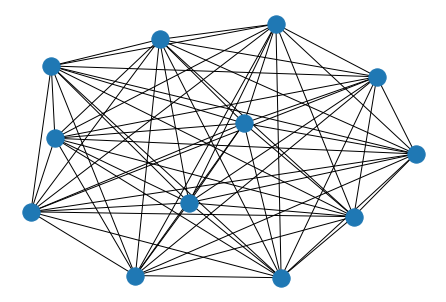

In [67]:
%pylab inline
nx.draw(G)

In [68]:
G = nx.Graph()
for entity in entity_sentence_list:
    s = set()
    for ele in entity:
        if ele[2] in ['ORG', 'PERSON']:
            s.add(ele[3])
    for ele in s:
        G.add_node(ele)
    for i, j in list(itertools.combinations(s, 2)):
        G.add_edge(i,j)

In [72]:
nx.write_graphml(G, "card_god.graphml")

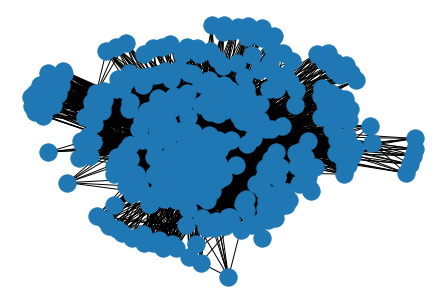

In [73]:
nx.draw_spring(G)